In [1]:
import yt
import numpy as np
import nibabel as nib

import matplotlib.pyplot as plt

from rich import print, inspect

In [2]:
%matplotlib notebook

In [3]:
print(f"dir(yt): {dir(yt)}")

dir(yt): ['AxisAlignedProjectionPlot', 'AxisAlignedSlicePlot', 'ColorTransferFunction', 'DatasetSeries', 
'DerivedField', 'FITSImageData', 'FITSOffAxisProjection', 'FITSOffAxisSlice', 'FITSParticleOffAxisProjection', 
'FITSParticleProjection', 'FITSProjection', 'FITSSlice', 'FieldDetector', 'FieldInfoContainer', 
'FixedResolutionBuffer', 'ImageArray', 'LineBuffer', 'LinePlot', 'OffAxisProjectionPlot', 'OffAxisSlicePlot', 
'ParticleImageBuffer', 'ParticlePhasePlot', 'ParticlePlot', 'ParticleProfile', 'ParticleProjectionPlot', 
'PhasePlot', 'Profile1D', 'Profile2D', 'Profile3D', 'ProfilePlot', 'ProjectionPlot', 'SlicePlot', 
'TransferFunction', 'UnitSystem', 'ValidateDataField', 'ValidateGridType', 'ValidateParameter', 'ValidateProperty',
'ValidateSpatial', 'YTArray', 'YTQuantity', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', 
'__name__', '__package__', '__path__', '__spec__', '__version__', '_maintenance', '_typing', '_version', 
'add_colormap', 'add_field', 'add_particle_filter', 'add_xray_emissivity_field', 'apply_colormap', 'arraytypes', 
'communication_system', 'config', 'create_profile', 'create_scene', 'data_objects', 'define_unit', 'derived_field',
'display_ytarray', 'enable_parallelism', 'enable_plugins', 'field_plugins', 'fields', 'frontends', 'funcs', 
'geometry', 'get_memory_usage', 'get_pbar', 'get_version_stack', 'get_yt_version', 'hexahedral_connectivity', 
'insert_ipython', 'is_root', 'is_sequence', 'load', 'load_amr_grids', 'load_archive', 'load_hdf5_file', 
'load_hexahedral_mesh', 'load_octree', 'load_particles', 'load_sample', 'load_simulation', 'load_uniform_grid', 
'load_unstructured_mesh', 'loaders', 'loadtxt', 'make_colormap', 'memory_checker', 'mylog', 'off_axis_projection', 
'only_on_root', 'ortho_find', 'parallel_objects', 'parallel_profile', 'particle_filter', 'periodic_position', 
'physical_constants', 'plot_2d', 'print_tb', 'quartiles', 'rootonly', 'run_nose', 'sample_data', 'save_as_dataset',
'savetxt', 'scale_image', 'set_log_level', 'show_colormaps', 'toggle_interactivity', 'uconcatenate', 'ucross', 
'udot', 'uhstack', 'uintersect1d', 'unit_system_registry', 'units', 'unorm', 'ustack', 'utilities', 'uunion1d', 
'uvstack', 'version_info', 'visualization', 'volume_render', 'volume_rendering', 'write_bitmap', 'write_image', 
'write_projection']

In [4]:
nii_img = nib.load("ExBox17/T1.nii.gz")
nii_data = nii_img.get_fdata()
print(f"Loaded nii_data: {nii_data.shape}")

plt.imshow(nii_data[100])
plt.show()

Loaded nii_data: (232, 256, 166)

<IPython.core.display.Javascript object>

In [5]:
dens = nii_data
data = dict(
    # particle_position_x=pos[0],
    # particle_position_y=pos[1],
    # particle_position_z=pos[2],
    Density=dens,
)
bbox = np.array([[0.0, 1.0], [0.0, 1.0], [0.0, 1.0]])
ds = yt.load_uniform_grid(data, dens.shape, 3.08e24, bbox=bbox)
print(f"Derived ds: {ds}, field_list: {ds.field_list}")

yt : [INFO     ] 2024-02-17 11:01:05,714 Parameters: current_time              = 0.0
yt : [INFO     ] 2024-02-17 11:01:05,714 Parameters: domain_dimensions         = [232 256 166]
yt : [INFO     ] 2024-02-17 11:01:05,714 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-02-17 11:01:05,714 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2024-02-17 11:01:05,714 Parameters: cosmological_simulation   = 0


Derived ds: UniformGridData, field_list: [('stream', 'Density')]

In [6]:
field = ds.field_list[0]  # ("stream", "Density")
im, sc = yt.volume_render(ds, field)
# yt.SlicePlot(ds, "x", field)
print(f"Generated sc: {sc}, {dir(sc)}")

yt : [INFO     ] 2024-02-17 11:01:05,899 Rendering scene (Can take a while).
yt : [INFO     ] 2024-02-17 11:01:05,899 Creating volume
yt : [INFO     ] 2024-02-17 11:01:06,311 Creating transfer function
yt : [INFO     ] 2024-02-17 11:01:06,311 Calculating data bounds. This may take a while. Set the TransferFunctionHelper.bounds to avoid this.
yt : [INFO     ] 2024-02-17 11:01:24,944 Found previously rendered image to save.
yt : [INFO     ] 2024-02-17 11:01:24,944 Saving rendered image to UniformGridData_Render_Density.png


Generated sc: <Scene Object>:
Sources: 
    source_00: <Volume Source>:YTRegion (UniformGridData): , center=[1.54e+24 1.54e+24 1.54e+24] cm, left_edge=[0. 
0. 0.] cm, right_edge=[3.08e+24 3.08e+24 3.08e+24] cm transfer_function:<Color Transfer Function Object>:
x_bounds:[  0, 2.9] nbins:512 features:
        ('gaussian', 'location(x):0.029', 'width(x):0.002', 'height(y):(0.073,   0, 0.084, 0.001)')
        ('gaussian', 'location(x):0.35', 'width(x):0.002', 'height(y):(0.35,   0, 0.62, 0.0022)')
        ('gaussian', 'location(x):0.66', 'width(x):0.002', 'height(y):(  0, 0.26, 0.87, 0.0046)')
        ('gaussian', 'location(x):0.98', 'width(x):0.002', 'height(y):(  0, 0.65, 0.72, 0.01)')
        ('gaussian', 'location(x):1.3', 'width(x):0.002', 'height(y):(  0, 0.6, 0.031, 0.022)')
        ('gaussian', 'location(x):1.6', 'width(x):0.002', 'height(y):(  0, 0.87,   0, 0.046)')
        ('gaussian', 'location(x):1.9', 'width(x):0.002', 'height(y):(0.78, 0.98,   0, 0.1)')
        ('gaussian', 'location(x):2.3', 'width(x):0.002', 'height(y):(  1, 0.71,   0, 0.22)')
        ('gaussian', 'location(x):2.6', 'width(x):0.002', 'height(y):(0.91,   0,   0, 0.46)')
        ('gaussian', 'location(x):2.9', 'width(x):0.002', 'height(y):(0.8, 0.67, 0.67,   1)')

Camera: 
    <Camera Object>:
        position:[1. 1. 1.] code_length
        focus:[0.5 0.5 0.5] code_length
        north_vector:[ 0.81649658 -0.40824829 -0.40824829]
        width:[1.5 1.5 1.5] code_length
        light:None
        resolution:(512, 512)
Lens: <Lens Object>:
        lens_type:plane-parallel
        viewpoint:[-866025.33679714 -866025.33679714 -866025.33679714] code_length, ['__class__', '__delattr__', 
'__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', 
'__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', 
'__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', 
'__subclasshook__', '__weakref__', '_annotate', '_annotate_multi', '_arr', '_camera', '_current', 
'_get_render_sources', '_last_render', '_quan', '_render_on_demand', '_repr_png_', '_set_new_unit_registry', 
'_setup_save', '_show_mpl', '_sigma_clip', '_unit_registry', '_validate', 'add_camera', 'add_source', 
'annotate_axes', 'annotate_domain', 'annotate_grids', 'annotate_mesh_lines', 'arr', 'camera', 'composite', 
'get_camera', 'get_source', 'opaque_sources', 'quan', 'render', 'save', 'save_annotated', 'set_camera', 'show', 
'sources', 'transparent_sources', 'unit_registry']

yt : [INFO     ] 2024-02-17 11:01:25,093 Rendering scene (Can take a while).


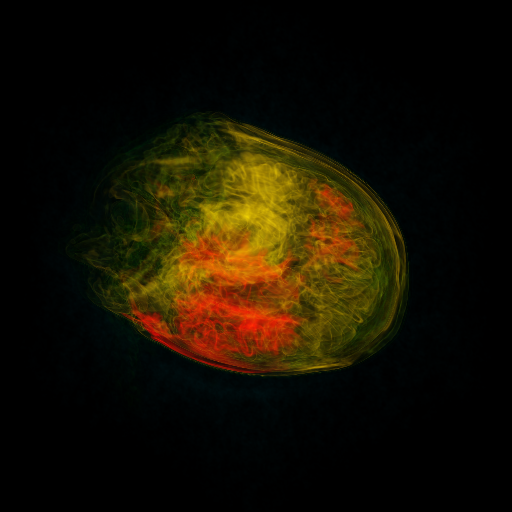

In [7]:
sc.render()
sc.show()

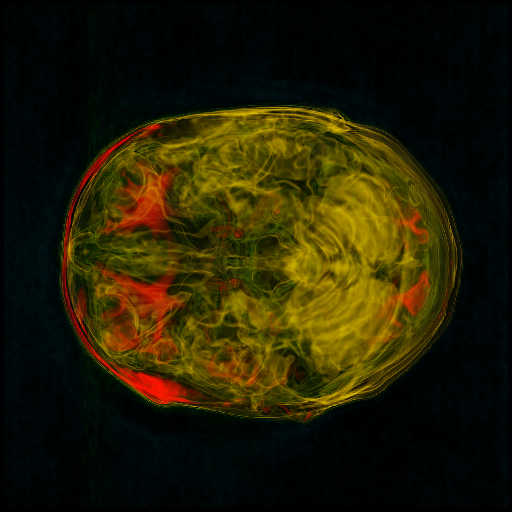

In [8]:
# yt.toggle_interactivity()
cam = sc.camera
cam.focus = np.array([0.5, 0.5, 0.0])
cam.position = np.array([0.5, 0.5, 0.0]) + np.array([0.0, 0.0, 1.0])
cam.north_vector = np.array([1.0, 0.0, 0.0])
cam.width = np.array([1.0] * 3)
sc.render()
sc.show()

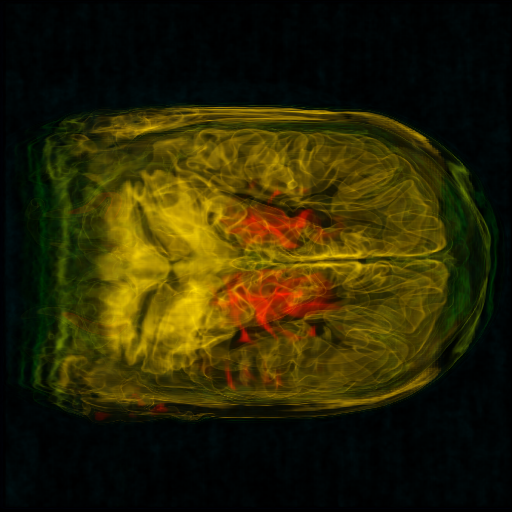

In [15]:
cam = sc.camera
cam.focus = np.array([0.5, 0.0, 0.5])
cam.position = np.array([0.5, 0.0, 0.5]) + np.array([0.0, 1.0, 0.0])
cam.north_vector = np.array([1.0, 0.0, 0.0])
cam.width = np.array([1.0] * 3)
sc.render()
sc.show()

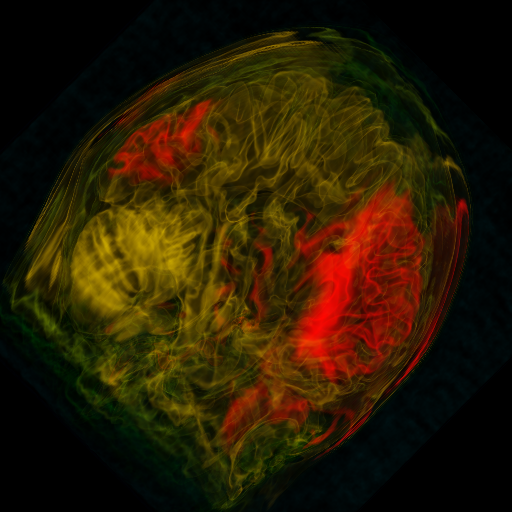

In [18]:
cam = sc.camera
cam.focus = np.array([0.0, 0.5, 0.5])
cam.position = np.array([0.0, 0.5, 0.5]) + np.array([1.0, 0.0, 0.0])
cam.north_vector = np.array([1.0, -1.0, 1.0])
cam.width = np.array([1.0] * 3)
sc.render()
sc.show()